### NETWORK TRAFFIC ANALYSIS AND ANOMALY DETECTION

In [ ]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

data = pd.read_csv('late.csv', encoding='latin')

print(data.head(2))

   No.          Time                    Source  \
0    1  0.000000e+00  2404:6800:4007:80a::200a   
1    2  2.240000e-07  2404:6800:4007:80a::200a   

                               Destination Protocol  Length  \
0  2409:40f4:100b:c1b6:b9fb:3ec3:5675:a236      UDP     195   
1  2409:40f4:100b:c1b6:b9fb:3ec3:5675:a236      UDP     112   

                    Info  
0  443  >  54762 Len=133  
1   443  >  54762 Len=50  


In [ ]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 117084 entries, 0 to 117083
Data columns (total 7 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   No.          117084 non-null  int64  
 1   Time         117084 non-null  float64
 2   Source       117084 non-null  object 
 3   Destination  117084 non-null  object 
 4   Protocol     117084 non-null  object 
 5   Length       117084 non-null  int64  
 6   Info         117084 non-null  object 
dtypes: float64(1), int64(2), object(4)
memory usage: 6.3+ MB
None


In [ ]:
num_rows = data.shape[0]
num_cols = data.shape[1]

print("Number of rows:", num_rows)
print("Number of columns:", num_cols)

Number of rows: 117084
Number of columns: 7


In [ ]:
print(data.head(5))

   No.          Time                                   Source  \
0    1  0.000000e+00                 2404:6800:4007:80a::200a   
1    2  2.240000e-07                 2404:6800:4007:80a::200a   
2    3  2.737900e-04  2409:40f4:100b:c1b6:b9fb:3ec3:5675:a236   
3    4  3.563550e-04  2409:40f4:100b:c1b6:b9fb:3ec3:5675:a236   
4    5  5.886481e-02                 2404:6800:4007:80a::200a   

                               Destination Protocol  Length  \
0  2409:40f4:100b:c1b6:b9fb:3ec3:5675:a236      UDP     195   
1  2409:40f4:100b:c1b6:b9fb:3ec3:5675:a236      UDP     112   
2                 2404:6800:4007:80a::200a      UDP     107   
3                 2404:6800:4007:80a::200a      UDP     102   
4  2409:40f4:100b:c1b6:b9fb:3ec3:5675:a236      UDP      87   

                    Info  
0  443  >  54762 Len=133  
1   443  >  54762 Len=50  
2   54762  >  443 Len=45  
3   54762  >  443 Len=40  
4   443  >  54762 Len=25  


In [ ]:
data.describe()

,No.,Time,Length
count,117084.000000,117084.000000,117084.000000
mean,58542.500000,2557.265139,675.000145
std,33799.383796,1998.481859,1062.354699
min,1.000000,0.000000,42.000000
25%,29271.750000,745.480519,86.000000
50%,58542.500000,2051.053935,101.000000
75%,87813.250000,3985.455522,1292.000000
max,117084.000000,6941.356968,17838.000000


In [ ]:
frequency=data['Source'].value_counts()
print(frequency)


2409:40f4:100b:c1b6:b9fb:3ec3:5675:a236    49902
2600:1901:1:c36::                          10065
2405:200:1630:a03::312c:c5c8                6536
64:ff9b::b97d:be1b                          4301
192.168.239.25                              3219
                                           ...  
35.161.58.74                                   1
3.223.30.183                                   1
185.125.188.59                                 1
140.211.166.134                                1
13.67.9.5                                      1
Name: Source, Length: 198, dtype: int64


<class 'pandas.core.series.Series'>
Index: 31 entries, 2409:40f4:100b:c1b6:b9fb:3ec3:5675:a236 to 2404:6800:4002:809::2002
Series name: Source
Non-Null Count  Dtype
--------------  -----
31 non-null     int64
dtypes: int64(1)
memory usage: 496.0+ bytes
None


Text(0, 0.5, 'frequency')

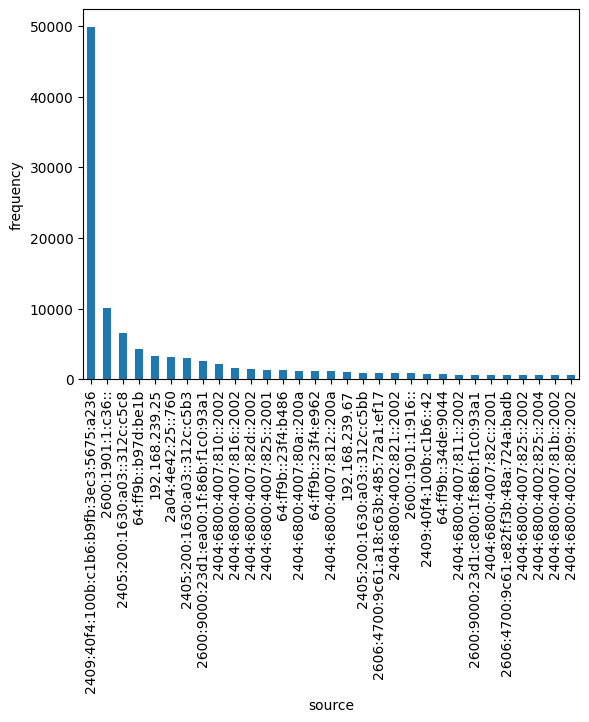

In [ ]:
import matplotlib.pyplot as plt
for i in frequency.index:
    if frequency[i]<500:
        frequency=frequency.drop(i)
print(frequency.info())
frequency.plot(kind='bar')
plt.xlabel('source')
plt.ylabel('frequency')

In [ ]:
destinationfrequency=data['Destination'].value_counts()
print(destinationfrequency)

2409:40f4:100b:c1b6:b9fb:3ec3:5675:a236    60423
2600:1901:1:c36::                           8550
2405:200:1630:a03::312c:c5c8                5184
64:ff9b::b97d:be1b                          3106
2a04:4e42:25::760                           2528
                                           ...  
3.223.30.183                                   2
44.239.69.248                                  2
Broadcast                                      1
ff02::1:ff59:2cd5                              1
ff02::1:ff00:42                                1
Name: Destination, Length: 208, dtype: int64


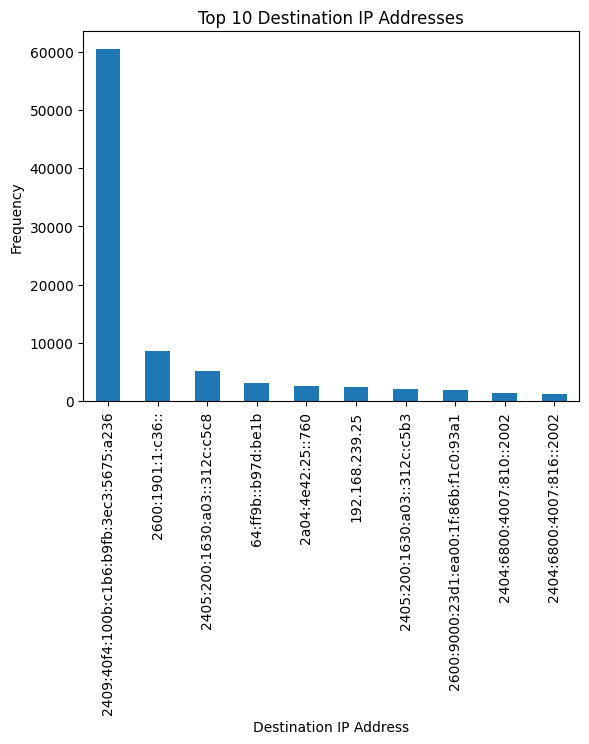

Top 10 Destination IP Addresses:
2409:40f4:100b:c1b6:b9fb:3ec3:5675:a236    60423
2600:1901:1:c36::                           8550
2405:200:1630:a03::312c:c5c8                5184
64:ff9b::b97d:be1b                          3106
2a04:4e42:25::760                           2528
192.168.239.25                              2382
2405:200:1630:a03::312c:c5b3                2134
2600:9000:23d1:ea00:1f:86b:f1c0:93a1        1923
2404:6800:4007:810::2002                    1384
2404:6800:4007:816::2002                    1210
Name: Destination, dtype: int64


In [ ]:
import matplotlib.pyplot as plt

destination_frequency = data['Destination'].value_counts()

top_destinations = destination_frequency.head(10)

top_destinations.plot(kind='bar')
plt.xlabel('Destination IP Address')
plt.ylabel('Frequency')
plt.title('Top 10 Destination IP Addresses')
plt.show()

# WE print the top 10 destination IP addresses and their frequencies
print("Top 10 Destination IP Addresses:")
print(top_destinations)


Text(0, 0.5, 'frequency')

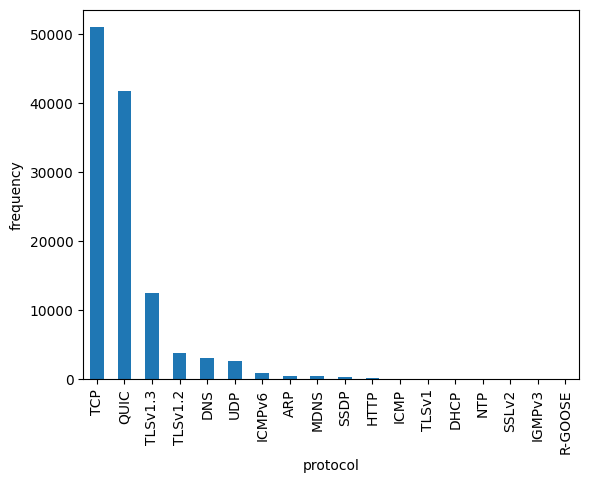

In [ ]:
protocoltraffic=data['Protocol'].value_counts()
protocoltraffic.plot(kind='bar')
plt.xlabel('protocol')
plt.ylabel('frequency')

In [ ]:
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
import pandas as pd
import tensorflow as tf
TF_ENABLE_ONEDNN_OPTS=1

features = ['Protocol', 'Length']
X = data[features]
X_encoded = pd.get_dummies(X, columns=['Protocol'])
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X_encoded)

input_dim = X_scaled.shape[1]
encoding_dim = 10

autoencoder = tf.keras.Sequential([
    tf.keras.layers.Dense(64, activation='relu', input_shape=(input_dim,)),
    tf.keras.layers.Dropout(0.2),  # Add dropout for regularization
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(encoding_dim, activation='relu'),
    tf.keras.layers.Dense(32, activation='relu'),  # Add a hidden layer for decoding
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(input_dim, activation='sigmoid')
])

autoencoder.compile(optimizer='adam', loss='mean_squared_error')
autoencoder.fit(X_scaled, X_scaled, epochs=20, batch_size=32)


reconstructed = autoencoder.predict(X_scaled)
mse = np.mean(np.power(X_scaled - reconstructed, 2), axis=1)
threshold = np.percentile(mse, 99.9)


anomalypoints = data[mse > threshold]

print("Anomaly points:")
print(anomalypoints)


Epoch 1/20
3659/3659 [==============================] - 26s 7ms/step - loss: 0.0073
Epoch 2/20
3659/3659 [==============================] - 15s 4ms/step - loss: 0.0024
Epoch 3/20
3659/3659 [==============================] - 11s 3ms/step - loss: 0.0024
Epoch 4/20
3659/3659 [==============================] - 10s 3ms/step - loss: 0.0010
Epoch 5/20
3659/3659 [==============================] - 11s 3ms/step - loss: 6.7537e-04
Epoch 6/20
3659/3659 [==============================] - 11s 3ms/step - loss: 6.6277e-04
Epoch 7/20
3659/3659 [==============================] - 11s 3ms/step - loss: 6.5381e-04
Epoch 8/20
3659/3659 [==============================] - 11s 3ms/step - loss: 6.5536e-04
Epoch 9/20
3659/3659 [==============================] - 13s 4ms/step - loss: 6.4869e-04
Epoch 10/20
3659/3659 [==============================] - 10s 3ms/step - loss: 6.4613e-04
Epoch 11/20
3659/3659 [==============================] - 10s 3ms/step - loss: 6.4137e-04
Epoch 12/20
3659/3659 [=======================

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


Anomalies:
           No.         Time                                Source  \
4147      4148   162.967202  2600:9000:23d1:ea00:1f:86b:f1c0:93a1   
4292      4293   163.058966  2600:9000:23d1:ea00:1f:86b:f1c0:93a1   
4295      4296   163.058985  2600:9000:23d1:ea00:1f:86b:f1c0:93a1   
4353      4354   163.108182  2600:9000:23d1:ea00:1f:86b:f1c0:93a1   
4356      4357   163.108201  2600:9000:23d1:ea00:1f:86b:f1c0:93a1   
...        ...          ...                                   ...   
89900    89901  4202.710946                      64:ff9b::d43:905   
92911    92912  4503.367935                      64:ff9b::d43:905   
105479  105480  5705.920885                      64:ff9b::d43:905   
105480  105481  5705.920886                      64:ff9b::d43:905   
111316  111317  6307.050279                      64:ff9b::d43:905   

                                    Destination  Protocol  Length  \
4147    2409:40f4:100b:c1b6:b9fb:3ec3:5675:a236        16    7334   
4292    2409:40f4:100b

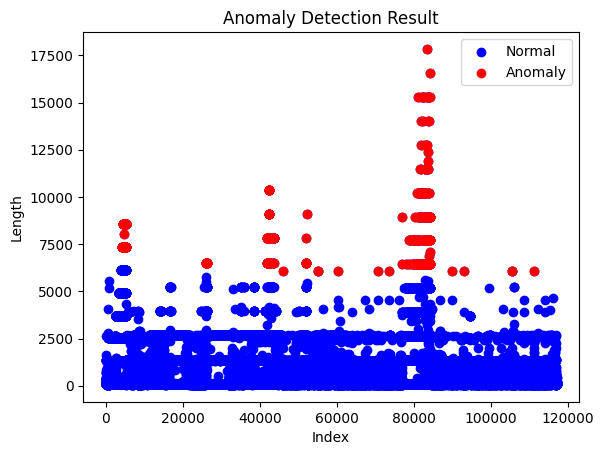

In [ ]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import IsolationForest, RandomForestClassifier

data = pd.read_csv('late.csv', encoding='latin')

label_encoder = LabelEncoder()
data['Protocol'] = label_encoder.fit_transform(data['Protocol'])

features = data[['Protocol', 'Length']]

isolation_forest = IsolationForest(contamination=0.0045, random_state=42)
anomaly_scores_if = isolation_forest.fit_predict(features)

random_forest = RandomForestClassifier(n_estimators=100, random_state=42)
random_forest.fit(features, anomaly_scores_if)

anomaly_predictions_rf = random_forest.predict(features)

anomalies = data[anomaly_predictions_rf == -1]
print("Anomalies:")
print(anomalies)

import matplotlib.pyplot as plt

plt.scatter(data.index, data['Length'], label='Normal', color='blue')

plt.scatter(anomalies.index, anomalies['Length'], label='Anomaly', color='red')

plt.title('Anomaly Detection Result')
plt.xlabel('Index')
plt.ylabel('Length')
plt.legend()
plt.show()


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


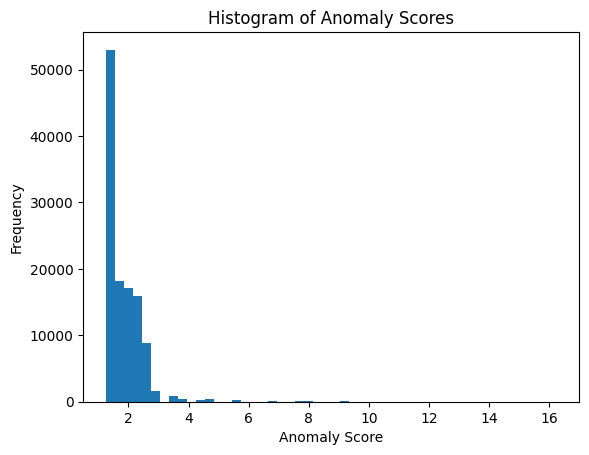

Detected Anomalies:
         No.         Time                                Source  \
4396    4397   163.113753  2600:9000:23d1:ea00:1f:86b:f1c0:93a1   
4397    4398   163.113753  2600:9000:23d1:ea00:1f:86b:f1c0:93a1   
4402    4403   163.114254  2600:9000:23d1:ea00:1f:86b:f1c0:93a1   
4444    4445   163.130880  2600:9000:23d1:ea00:1f:86b:f1c0:93a1   
4592    4593   163.206056  2600:9000:23d1:ea00:1f:86b:f1c0:93a1   
...      ...          ...                                   ...   
84199  84200  3665.341019                    64:ff9b::b97d:be1b   
84260  84261  3665.386209                    64:ff9b::b97d:be1b   
84263  84264  3665.386283                    64:ff9b::b97d:be1b   
84264  84265  3665.386283                    64:ff9b::b97d:be1b   
84270  84271  3665.388756                    64:ff9b::b97d:be1b   

                                   Destination Protocol  Length  \
4396   2409:40f4:100b:c1b6:b9fb:3ec3:5675:a236      TCP    8542   
4397   2409:40f4:100b:c1b6:b9fb:3ec3:5675

In [ ]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs

df = pd.read_csv('late.csv', encoding='latin')

numeric_df = df.select_dtypes(include=[np.number])

scaler = StandardScaler()
scaled_data = scaler.fit_transform(numeric_df)


kmeans = KMeans(n_clusters=2, random_state=42)
kmeans.fit(scaled_data)



cluster_labels = kmeans.predict(scaled_data)


centroid_distances = kmeans.transform(scaled_data)
anomaly_scores = np.mean(centroid_distances, axis=1)

plt.hist(anomaly_scores, bins=50)
plt.xlabel('Anomaly Score')
plt.ylabel('Frequency')
plt.title('Histogram of Anomaly Scores')
plt.show()

#  top 1% highest anomaly scores
anomaly_threshold = np.percentile(anomaly_scores, 99.9)
anomalies = df[anomaly_scores > anomaly_threshold]

print("Detected Anomalies:")
print(anomalies)